In [1]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

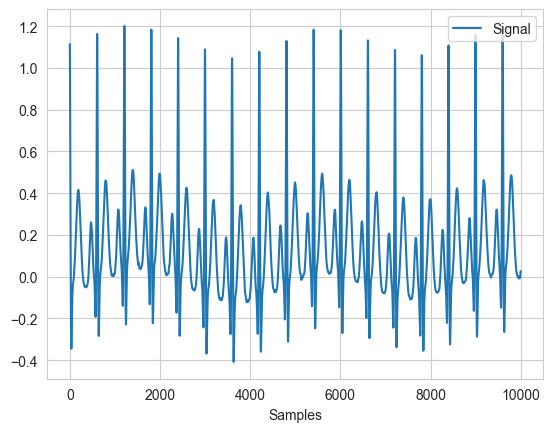

In [2]:
ecg100 = nk.ecg_simulate(duration=10, noise=0.01, heart_rate=100)

ecg_df = pd.DataFrame({"ECG_100": ecg100})

nk.signal_plot(ecg100)


In [3]:
print(ecg_df)

       ECG_100
0     1.114448
1     1.108481
2     1.093950
3     1.070957
4     1.040067
...        ...
9995  0.018399
9996  0.020926
9997  0.023231
9998  0.025242
9999  0.026890

[10000 rows x 1 columns]


In [4]:
from keras.layers import Input, Dense
from keras.models import Model

In [5]:
def create_and_train_autoencoder(input_data, epochs=100, batch_size=32):
    input_layer = Input(shape=(1,))
    encoded = Dense(64, activation='relu')(input_layer)
    decoded = Dense(1, activation='linear')(encoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    history = autoencoder.fit(input_data, input_data, epochs=epochs, batch_size=batch_size, shuffle=True, validation_split=0.3)

    encoded_data = autoencoder.predict(input_data)

    return history, encoded_data, autoencoder

In [6]:
ecg_100_data = nk.ecg_simulate(duration=10, noise=0.01, heart_rate=100)

In [7]:
history, encoded_ecg_100, autoencoder = create_and_train_autoencoder(ecg_100_data)

Epoch 1/100
219/219 [==============================] - 0s 695us/step - loss: 0.0104 - val_loss: 2.6751e-04
Epoch 2/100
219/219 [==============================] - 0s 447us/step - loss: 1.0646e-04 - val_loss: 5.1596e-05
Epoch 3/100
219/219 [==============================] - 0s 451us/step - loss: 3.1764e-05 - val_loss: 2.4133e-05
Epoch 4/100
219/219 [==============================] - 0s 484us/step - loss: 1.6521e-05 - val_loss: 1.4511e-05
Epoch 5/100
219/219 [==============================] - 0s 533us/step - loss: 9.6340e-06 - val_loss: 8.6184e-06
Epoch 6/100
219/219 [==============================] - 0s 470us/step - loss: 5.4196e-06 - val_loss: 5.0795e-06
Epoch 7/100
219/219 [==============================] - 0s 439us/step - loss: 3.3790e-06 - val_loss: 3.2984e-06
Epoch 8/100
219/219 [==============================] - 0s 435us/step - loss: 2.3110e-06 - val_loss: 2.2656e-06
Epoch 9/100
219/219 [==============================] - 0s 434us/step - loss: 1.6954e-06 - val_loss: 1.6445e-06
Epoch

In [8]:
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]
print(f'Training Loss: {train_loss:.4f}')
print(f'Validation Loss: {val_loss:.4f}')

Training Loss: 0.0000
Validation Loss: 0.0000


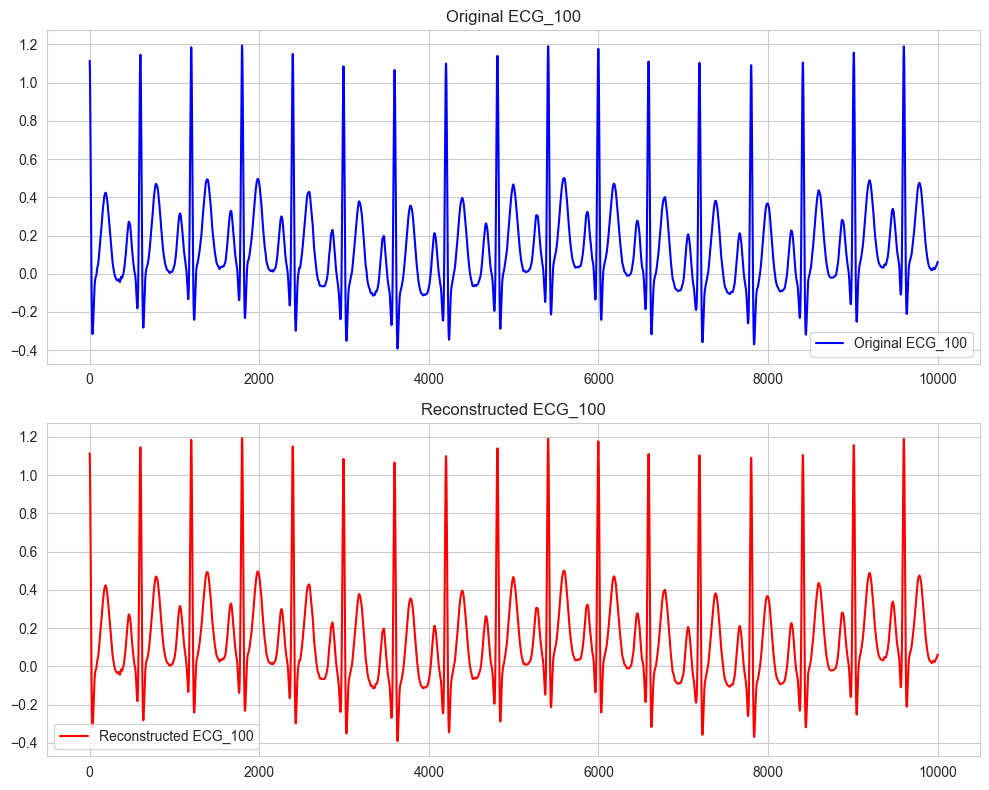

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

axes[0].plot(ecg_100_data, label='Original ECG_100', color='blue')
axes[0].set_title('Original ECG_100')
axes[0].legend()

axes[1].plot(encoded_ecg_100, label='Reconstructed ECG_100', color='red')
axes[1].set_title('Reconstructed ECG_100')
axes[1].legend()

plt.tight_layout()
plt.show()